In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:
tweets = pd.read_csv('/content/train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [214]:
tweets.shape

(7613, 5)

In [215]:
tweets["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

[Text(0, 0, 'Not Disaster (4342)'), Text(0, 0, 'Disaster (3271)')]

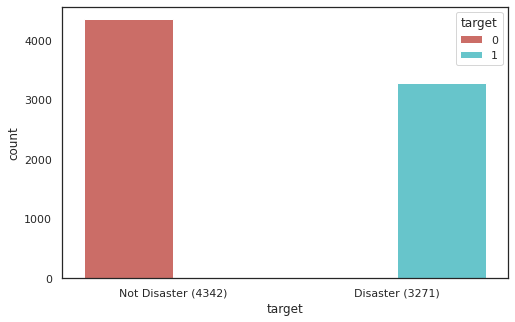

In [216]:
fig, axes = plt.subplots(figsize=(8, 5))
sns.countplot(x=tweets['target'], hue=tweets['target'], palette="hls")
axes.set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'])

##Pre-Processing the data

In [217]:
print(tweets.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [218]:
tweets.drop(['id','keyword','location'], axis=1, inplace=True)

In [219]:
tweets

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [220]:
tweets.shape

(7613, 2)

In [221]:
def remove_links(text):
    
    url = re.compile(r'https?://\S+|www\.\S+')
    
    return url.sub(r'',text)

tweets['text'] = [remove_links(r) for r in tweets['text']]

##Removing punctuation (.!<>{}’,”(/)-)

In [222]:
tweets["text"]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610          M1.94 [01:04 UTC]?5km S of Volcano Hawaii. 
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [223]:
# Replacing punctuations with space
tweets["text_processed"] = tweets["text"].str.replace("[^a-zA-Z0-90-9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [224]:
# Re ordering columns
tweets = tweets[['text','text_processed','target']]

In [225]:
tweets['text_processed']

0       Our Deeds are the Reason of this  earthquake M...
1                  Forest fire near La Ronge Sask  Canada
2       All residents asked to  shelter in place  are ...
3       13 000 people receive  wildfires evacuation or...
4       Just got sent this photo from Ruby  Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609     aria ahrary  TheTawniest The out of control w...
7610          M1 94  01 04 UTC  5km S of Volcano Hawaii  
7611    Police investigating after an e bike collided ...
7612    The Latest  More Homes Razed by Northern Calif...
Name: text_processed, Length: 7613, dtype: object

##Replacing short words

In [226]:
tweets['text_processed'] = tweets['text_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [227]:
tweets['text_processed'] = tweets['text_processed'].apply(lambda row:' '.join((x for x in row.split() if not x.isdigit())))

In [228]:
tweets['text_processed']

0       Our Deeds are the Reason this earthquake May A...
1                      Forest fire near Ronge Sask Canada
2       All residents asked shelter place are being no...
3       people receive wildfires evacuation orders Cal...
4       Just got sent this photo from Ruby Alaska smok...
                              ...                        
7608    Two giant cranes holding bridge collapse into ...
7609    aria ahrary TheTawniest The out control wild f...
7610                               UTC 5km Volcano Hawaii
7611    Police investigating after bike collided with ...
7612    The Latest More Homes Razed Northern Californi...
Name: text_processed, Length: 7613, dtype: object

In [229]:
# make entire text lowercase
tweets['text_processed'] = [review.lower() for review in tweets['text_processed']]

In [230]:
tweets['text_processed']

0       our deeds are the reason this earthquake may a...
1                      forest fire near ronge sask canada
2       all residents asked shelter place are being no...
3       people receive wildfires evacuation orders cal...
4       just got sent this photo from ruby alaska smok...
                              ...                        
7608    two giant cranes holding bridge collapse into ...
7609    aria ahrary thetawniest the out control wild f...
7610                               utc 5km volcano hawaii
7611    police investigating after bike collided with ...
7612    the latest more homes razed northern californi...
Name: text_processed, Length: 7613, dtype: object

##Remove stopwords

In [231]:
from nltk import word_tokenize
stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['http', 'www', 'com', 'via', 'twitter', 'amp', 'bfn', 'btw', 'dm', 'fyi', 'idk', 'ic', 'imho', 'irl', 'lmao', 'lmfao', 'lol', 'nsfw', 'omg', 'rofl', 'rt', 'tweet', 'ty', 'smh', 'atg']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
tweets['text_processed'] = [remove_stopwords(r) for r in tweets['text_processed']]

In [232]:
tweets['text_processed']

0               deeds reason earthquake may allah forgive
1                      forest fire near ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    aria ahrary thetawniest control wild fires cal...
7610                               utc 5km volcano hawaii
7611    police investigating bike collided car little ...
7612    latest homes razed northern california wildfir...
Name: text_processed, Length: 7613, dtype: object

In [233]:
# Begin Lemmatization 
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

tweets['text_processed'] = tweets['text_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [234]:
tweets['text_processed']

0                deed reason earthquake may allah forgive
1                      forest fire near ronge sask canada
2       resident ask shelter place notify officer evac...
3       people receive wildfire evacuation order calif...
4       get sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608     two giant crane hold bridge collapse nearby home
7609    aria ahrary thetawniest control wild fire cali...
7610                               utc 5km volcano hawaii
7611    police investigate bike collide car little por...
7612    late home raze northern california wildfire ab...
Name: text_processed, Length: 7613, dtype: object

In [235]:
tweets

,text,text_processed,target
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake may allah forgive,1
1,Forest fire near La Ronge Sask. Canada,forest fire near ronge sask canada,1
2,All residents asked to 'shelter in place' are ...,resident ask shelter place notify officer evac...,1
3,"13,000 people receive #wildfires evacuation or...",people receive wildfire evacuation order calif...,1
4,Just got sent this photo from Ruby #Alaska as ...,get sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,two giant crane hold bridge collapse nearby home,1
7609,@aria_ahrary @TheTawniest The out of control w...,aria ahrary thetawniest control wild fire cali...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,utc 5km volcano hawaii,1
7611,Police investigating after an e-bike collided ...,police investigate bike collide car little por...,1


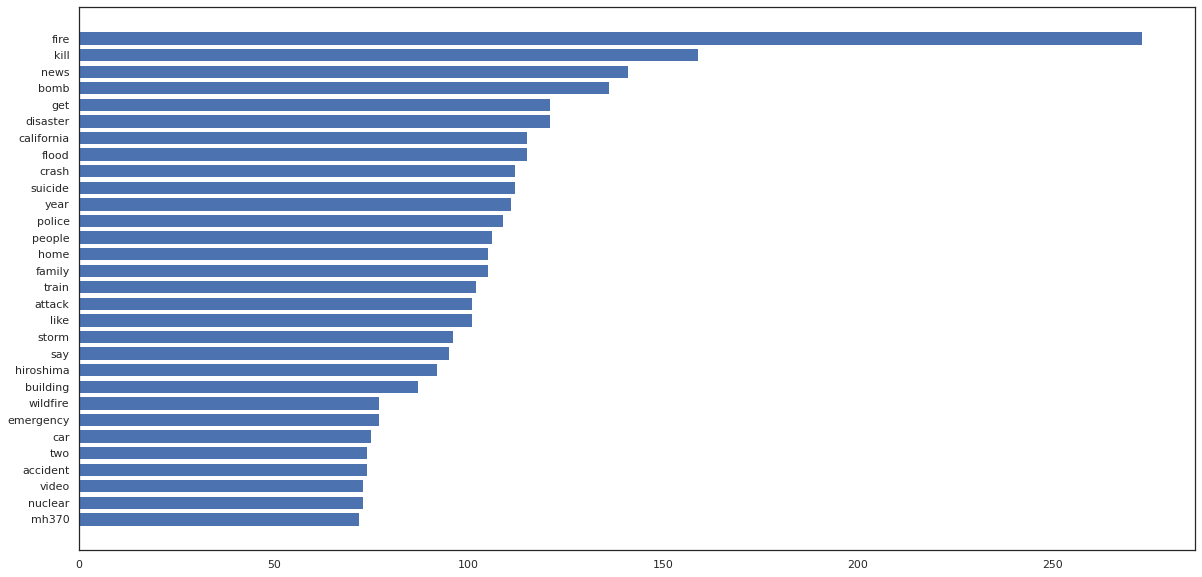

In [236]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_tweets = tweets.loc[tweets['target'] == 1,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_tweets['text_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

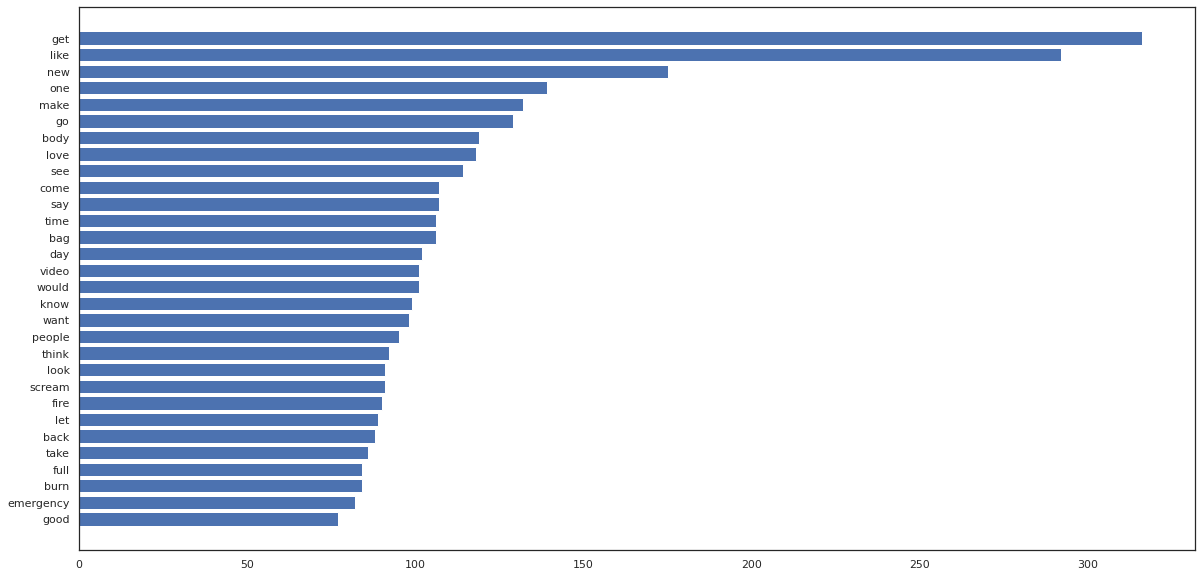

In [237]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_tweets = tweets.loc[tweets['target'] == 0,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_tweets['text_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

## Bag of Words Model

In [238]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

# Creating sparse matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(tweets.text_processed).toarray()
le = preprocessing.LabelEncoder()
le.fit(tweets["target"])
Y = le.transform(tweets["target"])
featureNames = tfidf.get_feature_names()

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [239]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [240]:
Y

array([1, 1, 1, ..., 1, 1, 1])

In [241]:
X_train.shape, X_test.shape

((6090, 2500), (1523, 2500))

## Building the ML model

## Naive Bayes

In [209]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_prob_pred = classifier.predict_proba(X_test)

In [210]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, classifier.predict(X_test), target_names=['Disaster','not a disaster']))

                precision    recall  f1-score   support

      Disaster       0.80      0.91      0.85       882
not a disaster       0.84      0.69      0.76       641

      accuracy                           0.82      1523
     macro avg       0.82      0.80      0.81      1523
  weighted avg       0.82      0.82      0.81      1523



In [211]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_prob_pred[:, 1])

0.864571725726172

##BernoulliNB

In [242]:
from sklearn.naive_bayes import BernoulliNB
berNB = BernoulliNB()
berNB.fit(X_train, Y_train)

Y_pred_BNB = berNB.predict(X_test)
Y_prob_pred_BNB = berNB.predict_proba(X_test)

In [243]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, berNB.predict(X_test), target_names=['Disaster','not a disaster']))

                precision    recall  f1-score   support

      Disaster       0.80      0.90      0.85       882
not a disaster       0.84      0.70      0.76       641

      accuracy                           0.82      1523
     macro avg       0.82      0.80      0.81      1523
  weighted avg       0.82      0.82      0.81      1523



In [244]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_prob_pred_BNB[:, 1])

0.8646433612446539

## Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR = LR_model.fit(X_train, Y_train)
pred = LR.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, LR.predict(X_test), target_names=['Disaster','not a disaster']))

                precision    recall  f1-score   support

      Disaster       0.79      0.90      0.84       882
not a disaster       0.83      0.68      0.75       641

      accuracy                           0.80      1523
     macro avg       0.81      0.79      0.79      1523
  weighted avg       0.81      0.80      0.80      1523



In [91]:
Y_prob_pred_LR = LR.predict_proba(X_test)
roc_auc_score(Y_test, Y_prob_pred_LR[:, 1])

0.8654879528514474

## Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
Parameter_Trials={'n_estimators':[100,200,300,400,500],
                  'criterion':['gini','entropy']}
RF=RandomForestClassifier()
clf_RF = RandomizedSearchCV(RF, Parameter_Trials, n_iter=2, cv=5, n_jobs=1, verbose=5)
clf_RF.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END criterion=entropy, n_estimators=400;, score=0.780 total time= 1.1min
[CV 2/5] END criterion=entropy, n_estimators=400;, score=0.787 total time= 1.1min
[CV 3/5] END criterion=entropy, n_estimators=400;, score=0.791 total time= 1.2min
[CV 4/5] END criterion=entropy, n_estimators=400;, score=0.784 total time= 1.2min
[CV 5/5] END criterion=entropy, n_estimators=400;, score=0.774 total time= 1.1min
[CV 1/5] END ..criterion=gini, n_estimators=300;, score=0.778 total time=  52.7s
[CV 2/5] END ..criterion=gini, n_estimators=300;, score=0.783 total time=  50.7s
[CV 3/5] END ..criterion=gini, n_estimators=300;, score=0.784 total time=  51.6s
[CV 4/5] END ..criterion=gini, n_estimators=300;, score=0.778 total time=  51.0s
[CV 5/5] END ..criterion=gini, n_estimators=300;, score=0.773 total time=  49.4s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2, n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=5)

In [ ]:
clf_RF.best_params_

{'criterion': 'entropy', 'n_estimators': 400}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators = 1000, random_state = 0)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [ ]:
print(classification_report(Y_test, model.predict(X_test), target_names=['Disaster','not a disaster']))

                precision    recall  f1-score   support

      Disaster       0.80      0.84      0.82       882
not a disaster       0.77      0.71      0.74       641

      accuracy                           0.79      1523
     macro avg       0.78      0.78      0.78      1523
  weighted avg       0.78      0.79      0.78      1523



In [ ]:
Y_prob_pred_RF = model.predict_proba(X_test)
roc_auc_score(Y_test, Y_prob_pred_RF[:, 1])

0.8405605611979582

## XGBoost

In [ ]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier(n_estimators=200, learning_rate=0.05)
model_xgb.fit(X_train,Y_train)

XGBClassifier(learning_rate=0.05, n_estimators=200)

In [ ]:
print(classification_report(Y_test, model_xgb.predict(X_test), target_names=['Disaster','not a disaster']))


                precision    recall  f1-score   support

      Disaster       0.70      0.94      0.81       882
not a disaster       0.86      0.46      0.59       641

      accuracy                           0.74      1523
     macro avg       0.78      0.70      0.70      1523
  weighted avg       0.77      0.74      0.72      1523



In [ ]:
Y_prob_pred_xgb = model_xgb.predict_proba(X_test)
roc_auc_score(Y_test, Y_prob_pred_xgb[:, 1])

0.7998379799137543

## Bernoulli Naive Bayes model gave better Accuracy of 0.82 and ROC score of 0.8646 than others and hence this model is used.

## Test Data

In [161]:
test_data = pd.read_csv("/content/test.csv")
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [162]:
print(test_data.isnull().sum())

id             0
keyword       26
location    1105
text           0
dtype: int64


In [163]:
test_data.drop(['keyword','location'], axis=1, inplace=True)

In [164]:
test_data

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [165]:
test_data.shape

(3263, 2)

In [166]:
def remove_links(text):
    
    url = re.compile(r'https?://\S+|www\.\S+')
    
    return url.sub(r'',text)

test_data['text'] = [remove_links(r) for r in test_data['text']]

In [167]:
test_data["text_processed"] = test_data["text"].str.replace("[^a-zA-Z0-90-9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [168]:
# Re ordering columns
test_data = test_data[['id', 'text','text_processed']]

In [169]:
from nltk import word_tokenize
stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['http', 'www','com', 'via', 'twitter', 'amp', 'bfn', 'btw', 'dm', 'fyi', 'idk', 'ic', 'imho', 'irl', 'lmao', 'lmfao', 'lol', 'nsfw', 'omg', 'rofl', 'rt', 'tweet', 'ty', 'smh', 'atg']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
test_data['text_processed'] = [remove_stopwords(r) for r in test_data['text_processed']]

In [170]:
# Begin Lemmatization 
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

test_data['text_processed'] = test_data['text_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Bag of words Model

In [171]:
X_test_data = tfidf.transform(test_data.text_processed).toarray()

In [172]:
X_test_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [173]:
Y_pred_test = berNB.predict(X_test_data)

In [174]:
test_data_out = pd.DataFrame(data={'id': test_data['id'],
                            'target': Y_pred_test})

In [175]:
import os  
os.makedirs('/content/sample_data', exist_ok=True)  
test_data_out.to_csv('/content/sample_data/out.csv')